<h1><center>VISUALISATION- Netflix OTT Revenue and Subscribers</center></h1>


<b>Import Necessary Libraries </b>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

<b>Load the dataset
</b>

In [2]:
df = pd.read_csv('Netflix Revenue.csv')

In [3]:
df

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
0,31-03-2012,869791000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.066650e+08,5.066650e+08,2409000.0,4.342500e+07,NaN,NaN,"50,90,74,000"
1,30-06-2012,889163000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.327050e+08,5.327050e+08,3024000.0,6.497300e+07,NaN,NaN,"53,57,29,000"
2,30-09-2012,905089000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.560270e+08,5.560270e+08,3689000.0,7.774400e+07,NaN,NaN,"55,97,16,000"
3,31-12-2012,945239000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.894710e+08,5.894710e+08,4892000.0,1.014000e+08,NaN,NaN,"59,43,63,000"
4,31-03-2013,1023961000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.386490e+08,6.386490e+08,6331000.0,1.420190e+08,NaN,NaN,"64,49,80,000"
5,30-06-2013,1069372000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.710890e+08,6.710890e+08,7014000.0,1.659020e+08,NaN,NaN,"67,81,03,000"
6,30-09-2013,1105999000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.010830e+08,7.010830e+08,8084000.0,1.830510e+08,NaN,NaN,"70,91,67,000"
7,31-12-2013,1175230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.405540e+08,7.405540e+08,9722000.0,2.214180e+08,NaN,NaN,"75,02,76,000"
8,31-03-2014,1270089000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.986170e+08,7.986170e+08,11755000.0,2.671180e+08,NaN,NaN,"81,03,72,000"
9,30-06-2014,1340407000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.382250e+08,8.382250e+08,12907000.0,3.074610e+08,NaN,NaN,"85,11,32,000"


In [4]:
df.head()

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
0,31-03-2012,869791000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,506665000.0,506665000.0,2409000.0,43425000.0,NaN,NaN,"50,90,74,000"
1,30-06-2012,889163000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,532705000.0,532705000.0,3024000.0,64973000.0,NaN,NaN,"53,57,29,000"
2,30-09-2012,905089000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,556027000.0,556027000.0,3689000.0,77744000.0,NaN,NaN,"55,97,16,000"
3,31-12-2012,945239000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,589471000.0,589471000.0,4892000.0,101400000.0,NaN,NaN,"59,43,63,000"
4,31-03-2013,1023961000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,638649000.0,638649000.0,6331000.0,142019000.0,NaN,NaN,"64,49,80,000"


The columns in the dataset include:

Date: The date corresponding to the metrics recorded.

Global Revenue: The total revenue generated by Netflix globally.

UACN Revenue: The revenue generated by Netflix from the UACN region.

EMEA Revenue: The revenue generated by Netflix from the EMEA (Europe, Middle East, and Africa) region.

LATM Revenue: The revenue generated by Netflix from the LATM (Latin America) region.

APAC Revenue: The revenue generated by Netflix from the APAC (Asia-Pacific) region.

UACN Members: The number of Netflix members in the UACN region.

EMEA Members: The number of Netflix members in the EMEA region.

LATM Members: The number of Netflix members in the LATM region.

APAC Members: The number of Netflix members in the APAC region.

EMEA RPU: Revenue per user (RPU) in the EMEA region.

LATM RPU: Revenue per user (RPU) in the LATM region.

APAC RPU: Revenue per user (RPU) in the APAC region.

Domestic Members: The number of Netflix members in the domestic market.

Domestic Revenue: The revenue generated by Netflix in the domestic market.

International Members: The number of Netflix members in the international market.

International Revenue: The revenue generated by Netflix in the international market.

Domestic Free Trialers: The number of Netflix free trial users in the domestic market.

International Free Trialers: The number of Netflix free trial users in the international market.

Netflix Global Users: The total number of Netflix users worldwide.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         45 non-null     object 
 1   Global Revenue               45 non-null     int64  
 2   UACN Revenue                 17 non-null     float64
 3   EMEA Revenue                 17 non-null     float64
 4   LATM Revenue                 17 non-null     float64
 5   APAC Revenue                 17 non-null     float64
 6   UACN Members                 17 non-null     float64
 7   EMEA  Members                17 non-null     float64
 8   LATM Members                 17 non-null     float64
 9   APAC Members                 17 non-null     float64
 10  UACN RPU                     17 non-null     float64
 11  EMEA RPU                     17 non-null     float64
 12  LATM  RPU                    17 non-null     float64
 13  APAC  RPU             

In [6]:
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',30)

<b>Data types</b>

In [7]:
df.dtypes

Date                            object
Global Revenue                   int64
UACN Revenue                   float64
EMEA Revenue                   float64
LATM Revenue                   float64
APAC Revenue                   float64
UACN Members                   float64
EMEA  Members                  float64
LATM Members                   float64
APAC Members                   float64
UACN RPU                       float64
EMEA RPU                       float64
LATM  RPU                      float64
APAC  RPU                      float64
Domestic Members               float64
Domestic Revenue               float64
International Members          float64
International Revenue          float64
Domestic Free Trialers         float64
Interntaional Free Trialers    float64
Netflix Global Users            object
dtype: object

In [8]:
df.columns

Index(['Date', 'Global Revenue', 'UACN Revenue', 'EMEA Revenue',
       'LATM Revenue', 'APAC Revenue', 'UACN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UACN RPU', 'EMEA RPU', 'LATM  RPU',
       'APAC  RPU', 'Domestic Members', 'Domestic Revenue',
       'International Members', 'International Revenue',
       'Domestic Free Trialers', 'Interntaional Free Trialers',
       'Netflix Global Users'],
      dtype='object')

<b>Missing values
</b>

In [9]:
#Missing values checking
df.isnull().sum()

Date                            0
Global Revenue                  0
UACN Revenue                   28
EMEA Revenue                   28
LATM Revenue                   28
APAC Revenue                   28
UACN Members                   28
EMEA  Members                  28
LATM Members                   28
APAC Members                   28
UACN RPU                       28
EMEA RPU                       28
LATM  RPU                      28
APAC  RPU                      28
Domestic Members               17
Domestic Revenue               17
International Members          17
International Revenue          17
Domestic Free Trialers         33
Interntaional Free Trialers    33
Netflix Global Users            0
dtype: int64

In [10]:
df.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
40    False
41    False
42    False
43    False
44    False
Length: 45, dtype: bool

In [11]:
# Remove commas and convert 'Netflix Global Users' column to numeric
df['Netflix Global Users'] = df['Netflix Global Users'].str.replace(',', '').astype(float)

# Extract the year from the 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [12]:
df.describe()

,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,UACN RPU,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users,Year
count,4.500000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,1.200000e+01,1.200000e+01,4.500000e+01,45.000000
mean,3.804736e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.910000,8.004706,9.050000,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1.498000e+06,3.873833e+06,7.682303e+08,2017.133333
std,2.559212e+09,4.209004e+08,4.594011e+08,1.349618e+08,2.204141e+08,3.129072e+06,1.149417e+07,4.624148e+06,8.939004e+06,1.432919,0.544059,0.508123,0.562361,4.402810e+08,4.402810e+08,2.372401e+07,6.444257e+08,2.989615e+05,1.435152e+06,5.773021e+08,3.286335
min,8.697910e+08,2.256851e+09,1.233379e+09,6.304720e+08,3.196020e+08,6.650100e+07,4.254200e+07,2.754700e+07,1.214100e+07,11.450000,10.130000,7.120000,7.690000,5.066650e+08,5.066650e+08,2.409000e+06,4.342500e+07,1.018000e+06,2.156000e+06,1.488630e+08,2012.000000
25%,1.484728e+09,2.702776e+09,1.723474e+09,7.853680e+08,4.836600e+08,6.996900e+07,5.873400e+07,3.431800e+07,1.983500e+07,13.220000,10.430000,7.500000,8.940000,7.306862e+08,7.306862e+08,9.312500e+06,2.118262e+08,1.378250e+06,2.814500e+06,2.206720e+08,2014.000000
50%,2.984859e+09,3.170972e+09,2.343674e+09,8.366470e+08,7.624140e+08,7.338700e+07,6.850800e+07,3.789400e+07,2.685300e+07,14.250000,10.880000,8.140000,9.210000,1.036056e+09,1.036056e+09,2.280000e+07,4.858165e+08,1.493000e+06,3.558000e+06,6.781030e+08,2017.000000
75%,6.148286e+09,3.350424e+09,2.432239e+09,9.989480e+08,8.707050e+08,7.429600e+07,7.353400e+07,3.962400e+07,3.371900e+07,14.910000,11.560000,8.370000,9.320000,1.310108e+09,1.310108e+09,4.591925e+07,1.075956e+09,1.603000e+06,4.605750e+06,1.133371e+09,2020.000000
max,8.161503e+09,3.608645e+09,2.561831e+09,1.070192e+09,9.335230e+08,7.521500e+07,7.737300e+07,4.169900e+07,3.947800e+07,16.370000,11.660000,8.670000,9.740000,1.996092e+09,1.996092e+09,8.077300e+07,2.105592e+09,2.065000e+06,7.131000e+06,2.076865e+09,2023.000000


In [13]:
df['Global Revenue'] = df['Global Revenue'].astype('int')

## ----------------------------------------------------------------------------------------------------------------------------------

<b>VISUALISATION using "matplotlib"</b>

<b>Netflix Global Revenue Over Time</b>

In [14]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

<b>Date vs Global Revenue </b>

In [15]:
# Sort the dataframe by date
df = df.sort_values('Date')

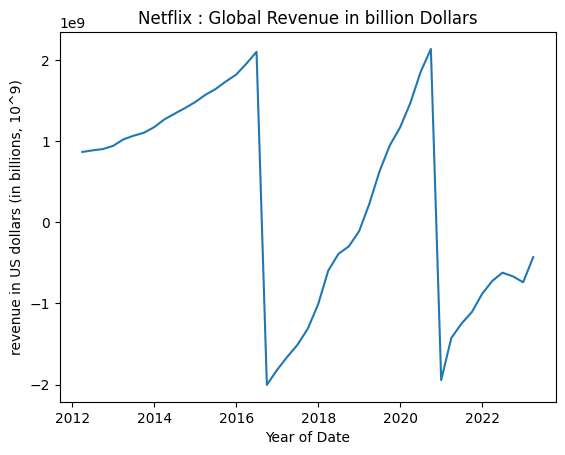

In [16]:
#Plotting Date vs Global Revenue 
plt.plot('Date','Global Revenue',data=df)
plt.xlabel('Year of Date')
plt.ylabel('revenue in US dollars (in billions, 10^9)')
plt.title('Netflix : Global Revenue in billion Dollars')
plt.show()

<b> Average Netflix Global Users by Year </b>

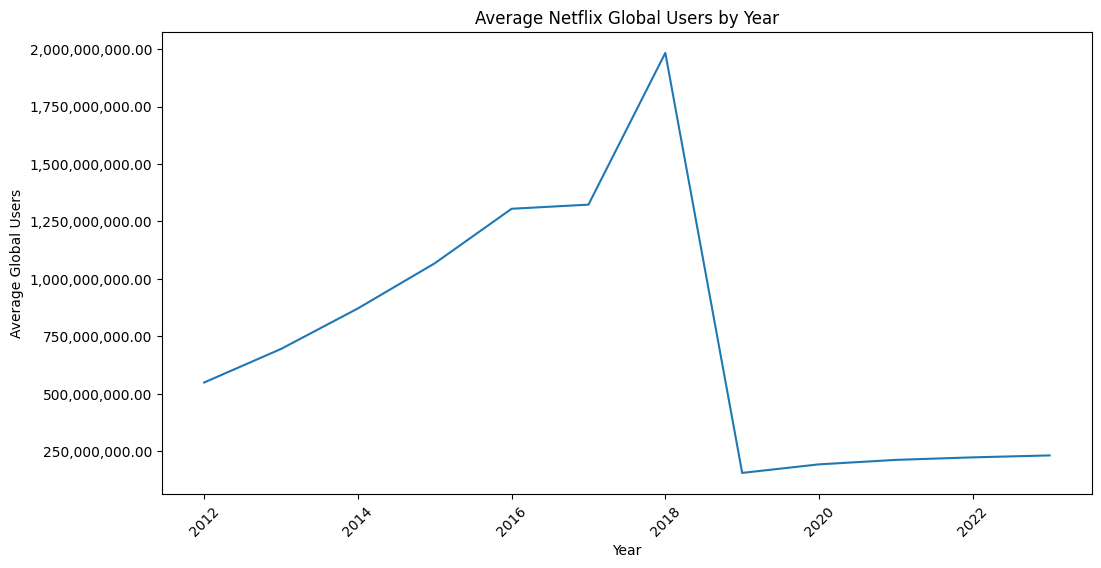

In [17]:
average_users = df.groupby('Year')['Netflix Global Users'].mean()

# Plot the average global users over time
plt.figure(figsize=(12, 6))
plt.plot(average_users.index, average_users.values)
plt.title('Average Netflix Global Users by Year')
plt.xlabel('Year')
plt.ylabel('Average Global Users')
plt.xticks(rotation=45)

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

<b>Netflix Global Users Trend</b>

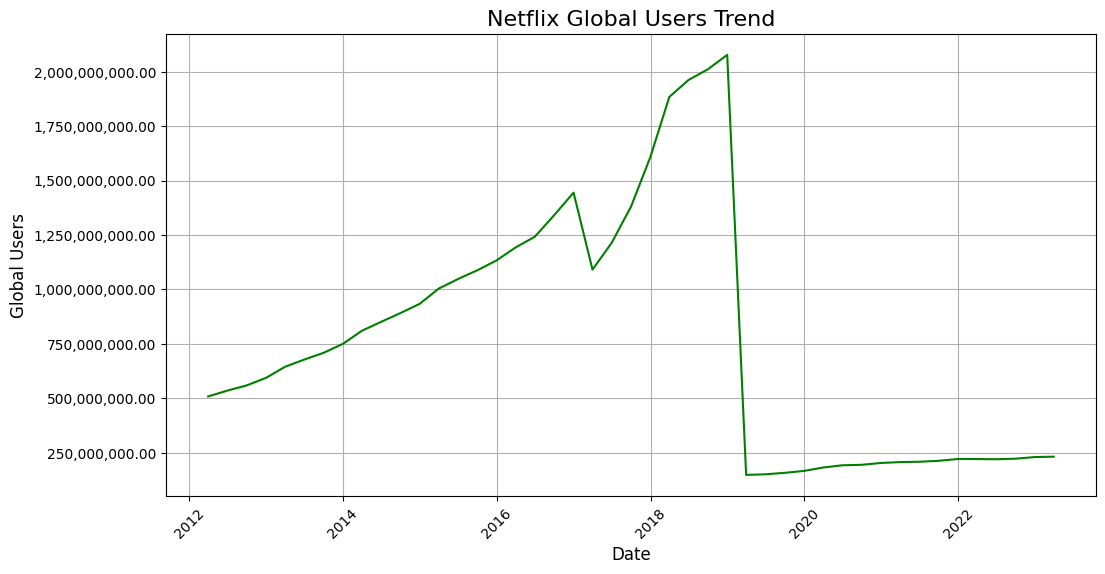

In [18]:
# Sort the data by date
df.sort_values('Date', inplace=True)

# Plot the global users trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Netflix Global Users'], color='green')
plt.title('Netflix Global Users Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Users', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

<b>Revenue by Region
</b>

In [19]:
# Drop rows with missing values in the revenue columns
df_clean = df.dropna(subset=['UACN Revenue', 'EMEA Revenue', 'LATM Revenue', 'APAC Revenue'])

In [20]:
# Calculate the sum of revenue by region
revenue_by_region = df_clean[['UACN Revenue', 'EMEA Revenue', 'LATM Revenue', 'APAC Revenue']].sum()

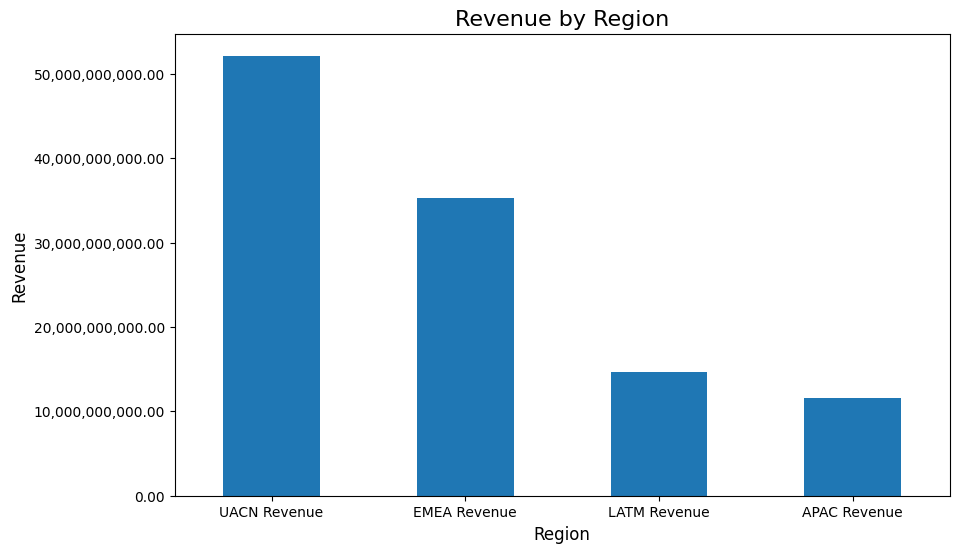

In [21]:
# Plot the bar chart of revenue by region
plt.figure(figsize=(10, 6))
revenue_by_region.plot(kind='bar',)
plt.title('Revenue by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=0)


# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()


In [22]:
revenue_by_region

UACN Revenue    5.217199e+10
EMEA Revenue    3.527779e+10
LATM Revenue    1.466930e+10
APAC Revenue    1.161217e+10
dtype: float64

<b>FULLFORMS</b> for next visualisation

UACN : United States and Canada
    
EMEA : Europe, Middle East and Africa
    
APAC : Asia-Pacific
    
LATM : Latin America

In [23]:
#Setting Required Series for Region Wise Revenue
x_time = df['Date'][28::] #(before 2019, region wise data is not available)
UACN = df['UACN Revenue'][28::]
EMEA = df['EMEA Revenue'][28::]
LATM= df['LATM Revenue'][28::]
APAC = df['APAC Revenue'][28::]
#Resetting Index of Each series to 0 because it was 28 , otherwise it will show key error.
APAC.reset_index(drop=True,inplace=True)
EMEA.reset_index(drop=True,inplace=True)
LATM.reset_index(drop=True,inplace=True)
UACN.reset_index(drop=True,inplace=True)
x_time.reset_index(drop=True,inplace=True)

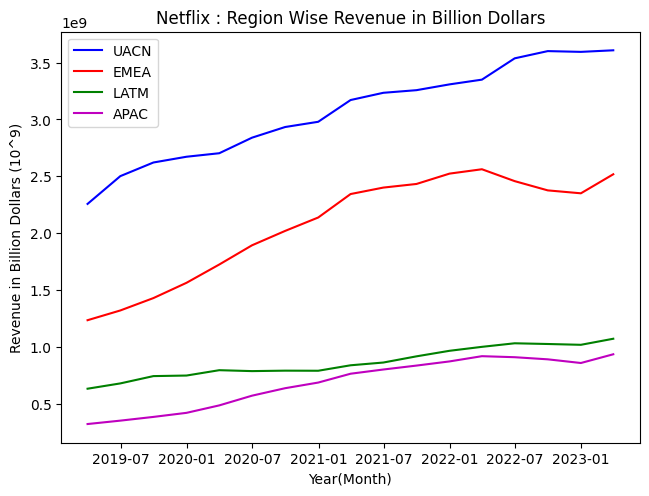

In [24]:
#Plotting Date vs Region Wise Revenue
plt.plot(x_time,UACN,color='b',label='UACN')
plt.plot(x_time,EMEA,color='r',label='EMEA')
plt.plot(x_time,LATM,color='g',label='LATM')
plt.plot(x_time,APAC,color='m',label='APAC')
plt.legend()
# plt.margins(0.15) #Default margin around data limits is 5%(0.05)
plt.tight_layout() #maintain good layout
plt.xlabel('Year(Month)')
plt.ylabel('Revenue in Billion Dollars (10^9)')
plt.title('Netflix : Region Wise Revenue in Billion Dollars')
plt.show()

In [25]:
#Setting Required Series for Region wise membership
uacn_members = df['UACN Members'][28::]
emea_members = df['EMEA  Members'][28::]
apac_members = df['APAC Members'][28::]
latm_members = df['LATM Members'][28::]
#Resetting Index
uacn_members.reset_index(drop=True,inplace=True)
emea_members.reset_index(drop=True,inplace=True)
latm_members.reset_index(drop=True,inplace=True)
apac_members.reset_index(drop=True,inplace=True)

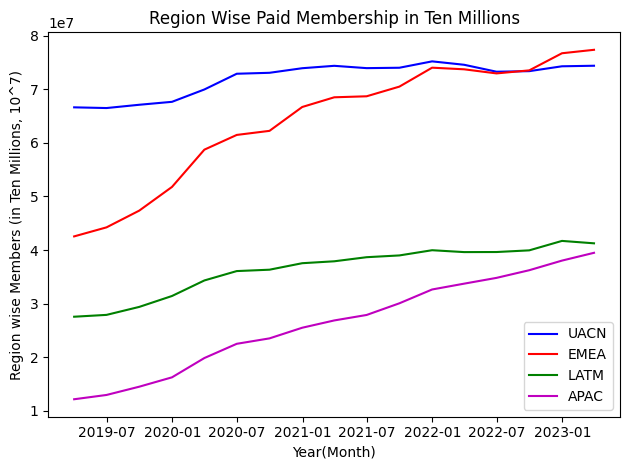

In [26]:
#Plotiing date vs Region Wise Membership
plt.plot(x_time,uacn_members,color='b',label='UACN')
plt.plot(x_time,emea_members,color='r',label='EMEA')
plt.plot(x_time,latm_members,color='g',label='LATM')
plt.plot(x_time,apac_members,color='m',label='APAC')
plt.legend()
plt.xlabel('Year(Month)')
plt.ylabel('Region wise Members (in Ten Millions, 10^7)')
plt.title('Region Wise Paid Membership in Ten Millions')
plt.tight_layout()

In [27]:
#Setting Required Series for Region Wise RPU
uacn_rpu = df['UACN RPU'][28::]
emea_rpu = df['EMEA RPU'][28::]
latm_rpu = df['LATM  RPU'][28::]
apac_rpu = df['APAC  RPU'][28::]
#Resetting Index
uacn_rpu.reset_index(drop=True,inplace=True)
emea_rpu.reset_index(drop=True,inplace=True)
latm_rpu.reset_index(drop=True,inplace=True)
apac_rpu.reset_index(drop=True,inplace=True)

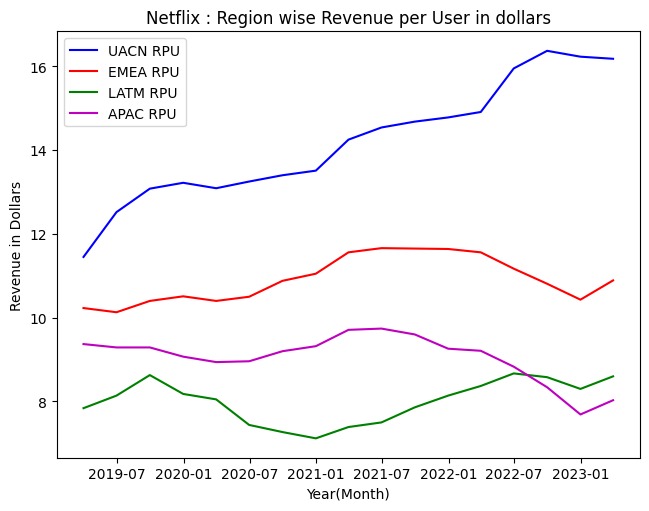

In [28]:
plt.plot(x_time,uacn_rpu,color='b',label='UACN RPU')
plt.plot(x_time,emea_rpu,color='r',label='EMEA RPU')
plt.plot(x_time,latm_rpu,color='g',label='LATM RPU')
plt.plot(x_time,apac_rpu,color='m',label='APAC RPU')
plt.legend()
plt.tight_layout()
plt.title('Netflix : Region wise Revenue per User in dollars')
plt.xlabel('Year(Month)')
plt.ylabel('Revenue in Dollars')
plt.show()


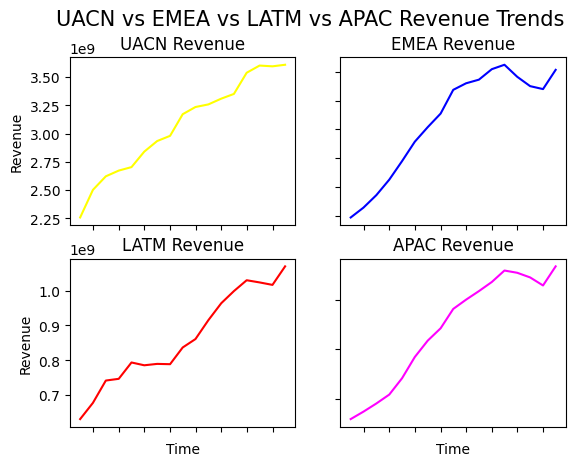

In [29]:
fig, axs = plt.subplots(2,2)
fig.suptitle('UACN vs EMEA vs LATM vs APAC Revenue Trends', fontsize =15)
axs[0,0].plot(df['Date'],df['UACN Revenue'],color= "yellow")
axs[0,1].plot(df['Date'],df['EMEA Revenue'],color= "blue")
axs[1,0].plot(df['Date'],df['LATM Revenue'],color= "red")
axs[1,1].plot(df['Date'],df['APAC Revenue'],color= "magenta")
axs[0,0].set_title('UACN Revenue', fontdict= {'color':'black','size':12})
axs[0,1].set_title('EMEA Revenue',fontdict= {'color':'black','size':12})
axs[1,0].set_title('LATM Revenue', fontdict= {'color':'black','size':12})
axs[1,1].set_title('APAC Revenue', fontdict= {'color':'black','size':12})

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Revenue' )
for ax in axs.flat:
    ax.set_xticklabels([])
    ax.label_outer()

<b>UACN vs EMEA vs LATM vs APAC Members Trends</b>

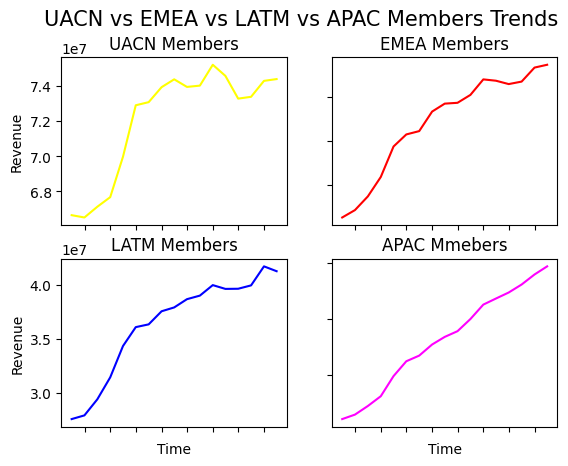

In [30]:
fig, axs = plt.subplots(2,2)
fig.suptitle('UACN vs EMEA vs LATM vs APAC Members Trends',fontsize=15 )
axs[0,0].plot(df['Date'],df['UACN Members'],color= "yellow")
axs[0,1].plot(df['Date'],df['EMEA  Members'],color= "red")
axs[1,0].plot(df['Date'],df['LATM Members'],color= "blue")
axs[1,1].plot(df['Date'],df['APAC Members'],color= "magenta")

axs[0,0].set_title('UACN Members', fontdict= {'color':'black','size':12})
axs[0,1].set_title('EMEA Members',fontdict= {'color':'black','size':12})
axs[1,0].set_title('LATM Members', fontdict= {'color':'black','size':12})
axs[1,1].set_title('APAC Mmebers', fontdict= {'color':'black','size':12})

   
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Revenue' )
for ax in axs.flat:
    ax.set_xticklabels([])
    ax.label_outer()


<b>UACN vs EMEA vs LATM vs APAC RPU(revenue per member) Trends
</b>

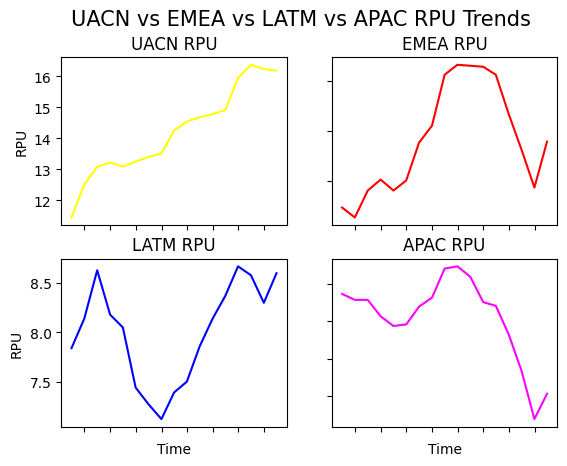

In [31]:
fig, axs = plt.subplots(2,2)
fig.suptitle('UACN vs EMEA vs LATM vs APAC RPU Trends',fontsize=15 )
axs[0,0].plot(df['Date'],df['UACN RPU'],color= "yellow")
axs[0,1].plot(df['Date'],df['EMEA RPU'],color= "red")
axs[1,0].plot(df['Date'],df['LATM  RPU'],color= "blue")
axs[1,1].plot(df['Date'],df['APAC  RPU'],color= "magenta")

axs[0,0].set_title('UACN RPU', fontdict= {'color':'black','size':12})
axs[0,1].set_title('EMEA RPU',fontdict= {'color':'black','size':12})
axs[1,0].set_title('LATM RPU', fontdict= {'color':'black','size':12})
axs[1,1].set_title('APAC RPU', fontdict= {'color':'black','size':12})

   
for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='RPU' )
for ax in axs.flat:
    ax.set_xticklabels([])
    ax.label_outer()

In [32]:
year=0
change_revenue=[]
for i in df['Global Revenue']:
    if year==0:
        revenue_old=i
        year = year+1
    else:
        difference_revenue = i-revenue_old
        revenue_old =i
        change_revenue.append(difference_revenue)
#Excluding first value which cannot subtract from previous revenue because it is first value.
change_revenue

[19372000,
 15926000,
 40150000,
 78722000,
 45411000,
 36627000,
 69231000,
 94859000,
 70318000,
 69025000,
 75296000,
 88401000,
 71565000,
 93661000,
 84978000,
 134403000,
 147468000,
 -4109983296,
 187353000,
 159094000,
 148829000,
 199395000,
 300896000,
 415101000,
 206414000,
 92104000,
 187467000,
 334151000,
 402124000,
 321789000,
 222529000,
 300257000,
 380595000,
 287351000,
 -4086162296,
 518840000,
 178495000,
 141690000,
 225851000,
 158449000,
 102374000,
 -44552000,
 -73536000,
 309450000]

In [33]:
change_revenue_time = df['Date'][1::]
#Resetting Index
change_revenue_time.reset_index(drop=True,inplace=True)

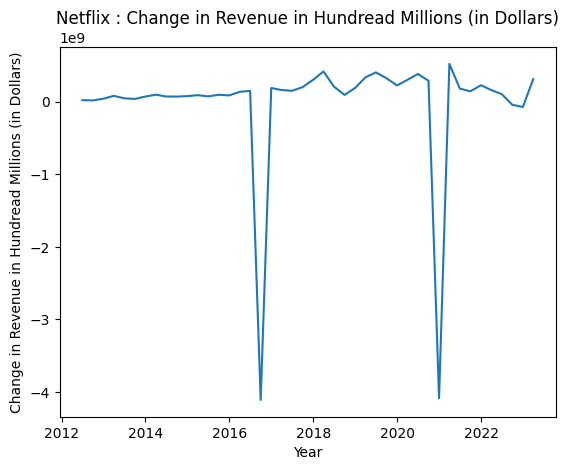

In [34]:
#Plotting Date vs Change in Netflix's Revenue
plt.plot(change_revenue_time,change_revenue)
plt.xlabel('Year')
plt.ylabel('Change in Revenue in Hundread Millions (in Dollars)')
plt.title('Netflix : Change in Revenue in Hundread Millions (in Dollars)')
plt.show()

<b>Domestic vs International Revenue Trends</b>

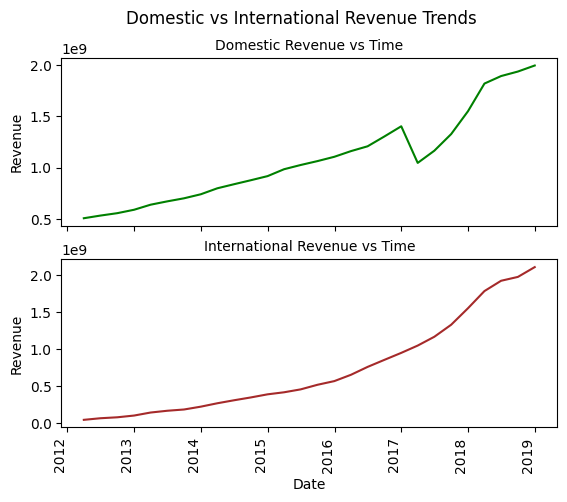

In [35]:
fig, axs = plt.subplots(2)
fig.suptitle('Domestic vs International Revenue Trends')
axs[0].plot(df['Date'],df["Domestic Revenue"],color= "green")
axs[1].plot(df['Date'],df["International Revenue"],color= "brown")
axs[0].set_title('Domestic Revenue vs Time', fontdict= {'color':'black','size':10})
axs[1].set_title('International Revenue vs Time',fontdict= {'color':'black','size':10})
plt.xticks(rotation=90, ha='right')
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Revenue')
for ax in axs.flat:
    ax.label_outer()

<b>Domestic vs International Free Trialers Trends</b>

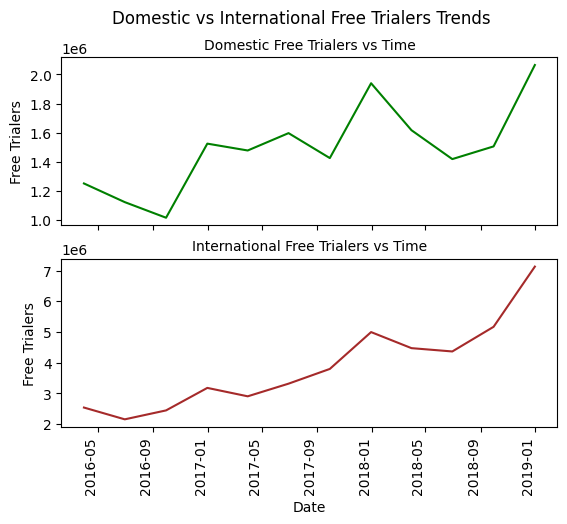

In [36]:
fig, axs = plt.subplots(2)
fig.suptitle('Domestic vs International Free Trialers Trends')
axs[0].plot(df['Date'],df["Domestic Free Trialers"],color= "green")
axs[1].plot(df['Date'],df['Interntaional Free Trialers'],color= "brown")
axs[0].set_title('Domestic Free Trialers vs Time', fontdict= {'color':'black','size':10})
axs[1].set_title('International Free Trialers vs Time',fontdict= {'color':'black','size':10})
plt.xticks(rotation=90, ha='right')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Free Trialers')

for ax in axs.flat:
    ax.label_outer()

<center><b> THANK YOU</b> </center>